# Определение перспективного тарифа для телеком-компании

Компания «Мегалайн» — федеральный оператор сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.<br> <br>
Предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В нашем распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Импорт необходимых библиотек

In [1]:
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings("ignore")

## Изучение данных из файлов

In [2]:
data_call = pd.read_csv('/Users/daniilsobolev/Desktop/ml projects/Статистический анализ/calls.csv')
data_internet = pd.read_csv('/Users/daniilsobolev/Desktop/ml projects/Статистический анализ/internet.csv')
data_message = pd.read_csv('/Users/daniilsobolev/Desktop/ml projects/Статистический анализ/messages.csv')
data_tariff = pd.read_csv('//Users/daniilsobolev/Desktop/ml projects/Статистический анализ/tariffs.csv')
data_user = pd.read_csv('/Users/daniilsobolev/Desktop/ml projects/Статистический анализ/users.csv')

### Информация о звонках

In [3]:
display(data_call.head())

,id,call_date,duration,user_id
0,1000_0,2018-07-25,0.00,1000
1,1000_1,2018-08-17,0.00,1000
2,1000_2,2018-06-11,2.85,1000
3,1000_3,2018-09-21,13.80,1000
4,1000_4,2018-12-15,5.18,1000


**id** — уникальный номер звонка<br>
**call_date** — дата звонка<br>
**duration** — длительность звонка в минутах<br>
**user_id** — идентификатор пользователя, сделавшего звонок<br>

**Необходмо доработать:**<br>
**1) Длительность звонка округлить до целых в большую сторону<br>**
**2) Дату звонка записать в отдельном столбце month**

### Информация об интернет-сессиях

In [4]:
data_internet.head()

,Unnamed: 0,id,mb_used,session_date,user_id
0,0,1000_0,112.95,2018-11-25,1000
1,1,1000_1,1052.81,2018-09-07,1000
2,2,1000_2,1197.26,2018-06-25,1000
3,3,1000_3,550.27,2018-08-22,1000
4,4,1000_4,302.56,2018-09-24,1000


**id** — уникальный номер сессии<br>
**mb_used** — объём потраченного за сессию интернет-трафика (в мегабайтах)<br>
**session_date** — дата интернет-сессии<br>
**user_id** — идентификатор пользователя<br>


**Необходмо доработать:**<br>
**1) Удалить столбец "Unnamed:0"**<br>
**2) Дату интернет-сессии записать в отдельном столбце month**

### Информация о сообщениях

In [5]:
data_message.head()

,id,message_date,user_id
0,1000_0,2018-06-27,1000
1,1000_1,2018-10-08,1000
2,1000_2,2018-08-04,1000
3,1000_3,2018-06-16,1000
4,1000_4,2018-12-05,1000


**id** — уникальный номер сообщения<br>
**message_date** — дата сообщения<br>
**user_id** — идентификатор пользователя, отправившего сообщение<br>

**Необходмо доработать:**<br>
**1) Дату сообщения записать в отдельном столбце month**<br>

### Информация о тарифах

In [6]:
display(data_tariff)

,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


**tariff_name** — название тарифа<br>
**rub_monthly_fee** — ежемесячная абонентская плата в рублях<br>
**minutes_included** — количество минут разговора в месяц, включённых в абонентскую плату<br>
**messages_included** — количество сообщений в месяц, включённых в абонентскую плату<br>
**mb_per_month_included** — объём интернет-трафика, включённого в абонентскую плату (в мегабайтах)<br>
**rub_per_minute** — стоимость минуты разговора сверх тарифного пакета (например, если в тарифе 100 минут разговора в месяц, то со 101 минуты будет взиматься плата)<br>
**rub_per_message** — стоимость отправки сообщения сверх тарифного пакета<br>
**rub_per_gb** — стоимость дополнительного гигабайта интернет-трафика сверх тарифного пакета (1 гигабайт = 1024 мегабайта)<br>

Всего в наличие два тарифа **smart** и **ultra**.

**Необходмо доработать:**<br>
**1) Перевести из mb в gb**<br>

### Информация о пользователях

In [7]:
display(data_user.head())

,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra


**user_id** — уникальный идентификатор пользователя<br>
**first_name** — имя пользователя<br>
**last_name** — фамилия пользователя<br>
**age** — возраст пользователя (годы)<br>
**reg_date** — дата подключения тарифа (день, месяц, год)<br>
**churn_date** — дата прекращения пользования тарифом (если значение пропущено, то тариф ещё действовал на момент выгрузки данных)<br>
**city** — город проживания пользователя<br>
**tarif** — название тарифного плана<br>

**Необходмо доработать:**<br>
**1) Дату подключения тарифа записать в отдельном столбце month**<br>

### Вывод

Все файлы успешно открыты. Изучена информация о данных, с которыми будет работать.<br>
На следующем этапе займемся предобработкой данных.

## Предобработка данных

### DATA CALL

In [8]:
import numpy as np
    
data_call['duration'] = np.ceil(data_call['duration'])
data_call['duration'] = data_call['duration'].astype('int')

In [9]:
data_call['call_date'] = pd.to_datetime(data_call['call_date'], format='%Y-%m-%d')
data_call['month'] = data_call['call_date'].dt.month
data_call = data_call.drop(columns=['call_date'], axis=1)

In [10]:
display(data_call.head())

,id,duration,user_id,month
0,1000_0,0,1000,7
1,1000_1,0,1000,8
2,1000_2,3,1000,6
3,1000_3,14,1000,9
4,1000_4,6,1000,12


In [11]:
data_call.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   id        202607 non-null  object
 1   duration  202607 non-null  int64 
 2   user_id   202607 non-null  int64 
 3   month     202607 non-null  int64 
dtypes: int64(3), object(1)
memory usage: 6.2+ MB


### DATA INTERNET

In [12]:
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'], format='%Y-%m-%d')
data_internet['month'] = data_internet['session_date'].dt.month
data_internet = data_internet.drop(columns=['Unnamed: 0', 'session_date'], axis=1)

In [13]:
display(data_internet.head())

,id,mb_used,user_id,month
0,1000_0,112.95,1000,11
1,1000_1,1052.81,1000,9
2,1000_2,1197.26,1000,6
3,1000_3,550.27,1000,8
4,1000_4,302.56,1000,9


In [14]:
data_internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 4 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       149396 non-null  object 
 1   mb_used  149396 non-null  float64
 2   user_id  149396 non-null  int64  
 3   month    149396 non-null  int64  
dtypes: float64(1), int64(2), object(1)
memory usage: 4.6+ MB


### DATA MESSAGE

In [15]:
data_message['message_date'] = pd.to_datetime(data_message['message_date'], format='%Y-%m-%d')
data_message['month'] = data_message['message_date'].dt.month
data_message = data_message.drop(columns=['message_date'], axis=1)

In [16]:
display(data_message.head())

,id,user_id,month
0,1000_0,1000,6
1,1000_1,1000,10
2,1000_2,1000,8
3,1000_3,1000,6
4,1000_4,1000,12


In [17]:
data_message.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
 #   Column   Non-Null Count   Dtype 
---  ------   --------------   ----- 
 0   id       123036 non-null  object
 1   user_id  123036 non-null  int64 
 2   month    123036 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 2.8+ MB


### DATA USER

In [18]:
data_user['reg_date'] = pd.to_datetime(data_user['reg_date'], format='%Y-%m-%d')
data_user['month'] = data_user['reg_date'].dt.month
data_user = data_user.drop(columns=['reg_date'], axis=1)

In [19]:
display(data_user.head())

,user_id,age,churn_date,city,first_name,last_name,tariff,month
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,ultra,5
1,1001,41,NaN,Москва,Иван,Ежов,smart,11
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,smart,6
3,1003,23,NaN,Москва,Белла,Белякова,ultra,8
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,ultra,5


In [20]:
data_user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   age         500 non-null    int64 
 2   churn_date  38 non-null     object
 3   city        500 non-null    object
 4   first_name  500 non-null    object
 5   last_name   500 non-null    object
 6   tariff      500 non-null    object
 7   month       500 non-null    int64 
dtypes: int64(3), object(5)
memory usage: 31.4+ KB


### DATA TARIFF

In [21]:
data_tariff['mb_per_month_included'] = (data_tariff['mb_per_month_included'] / 1024)
data_tariff['mb_per_month_included'] = data_tariff['mb_per_month_included'].fillna('0').astype('int')

data_tariff = data_tariff.rename(columns={'mb_per_month_included': "gb_per_month_included"})

In [22]:
display(data_tariff.head())

,messages_included,gb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15,500,550,200,3,3,smart
1,1000,30,3000,1950,150,1,1,ultra


### Вывод

Данные предобработаны. Приведены к нужным типам. Пропусков нет. <br>
Подготовим данные к анализу.

## Подготовка к анализу 

**Посчитаем для каждого пользователя следующие значения:**
1) Количество сделанных звонков и израсходованных минут разговора по месяцам;<br>
2) Количество отправленных сообщений по месяцам;<br>
3) Объем израсходованного интернет-трафика по месяцам;<br>
4) Помесячную выручку с каждого пользователя.

In [23]:
data_1 = pd.pivot_table(data_call, 
                        index=['user_id', 'month'], 
                        values='duration', 
                        aggfunc=['sum', 'count'])

data_2 = pd.pivot_table(data_internet, 
                        index=['user_id', 'month'], 
                        values='mb_used', 
                        aggfunc=['sum'])

data_3 = pd.pivot_table(data_message, 
                        index=['user_id', 'month'], 
                        values='id', 
                        aggfunc=['count'])

data = data_1.join(data_2)
data = data.join(data_3)

data = data.reset_index()
data = data.merge(data_user, on='user_id')

In [24]:
data = data.drop(columns=['first_name', 
                          'last_name', 
                          'month',
                          'age',
                          'churn_date',
                          ('user_id', '')], 
                 axis=1)

data = data.rename(columns={("month", ""): "month", 
                            ('count', 'duration'): "number_of_calls", 
                            ('sum', 'duration'): "total_duration", 
                            ('sum', 'mb_used'): "gb_used",
                            ('count', 'id'): "total_messages"})

In [25]:
data['gb_used'] = data['gb_used'] / 1024
data['gb_used'] = np.ceil(data['gb_used']).fillna('0').astype('int')
data['total_messages'] = data['total_messages'].fillna('0').astype('int')
data['revenue'] = 0

In [26]:
for i in range(len(data)):
    if data['tariff'][i] == 'ultra':
        tariff = 1
    else: tariff = 0
        
    data['revenue'][i] = data_tariff['rub_monthly_fee'][tariff]
    
    difference_1 = data['total_duration'][i] - data_tariff['minutes_included'][tariff]
    difference_2 = data['gb_used'][i] - data_tariff['gb_per_month_included'][tariff]
    difference_3 = data['total_messages'][i] - data_tariff['messages_included'][tariff]
    
    if difference_1 > 0:
        data['revenue'][i] = data['revenue'][i] + difference_1 * data_tariff['rub_per_minute'][tariff]
    if difference_2 > 0:
        data['revenue'][i] = data['revenue'][i] + difference_2 * data_tariff['rub_per_gb'][tariff]
    if difference_3 > 0:
        data['revenue'][i] = data['revenue'][i] + difference_3 * data_tariff['rub_per_message'][tariff]

In [27]:
data.head()

,user_id,month,total_duration,number_of_calls,gb_used,total_messages,city,tariff,revenue
0,1000,5,159,22,3,22,Краснодар,ultra,1950
1,1000,6,172,43,23,60,Краснодар,ultra,1950
2,1000,7,340,47,14,75,Краснодар,ultra,1950
3,1000,8,408,52,14,81,Краснодар,ultra,1950
4,1000,9,466,58,15,57,Краснодар,ultra,1950


### Вывод

Были успешно составлены сводные таблицы по столбцам месяца и идентификатора пользователя, затем соединены в одну большую таблицу.<br>
Была подсчитана выручка с каждого пользователя для каждого месяца.

## Анализ данных

**Проанализируем данные:**<br>
**Посмотрим сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц:**<br>
1) Посчитаем среднее количество, дисперсию и стандартное отклонение. <br>
2) Построим гистограммы.

In [28]:
data_smart = data[data['tariff'] == 'smart']
data_ultra = data[data['tariff'] == 'ultra']

### Тариф smart

In [29]:
print('Среднее значение длительности разговора для тарифа смарт:', data_smart['total_duration'].mean())
print('Среднее значение используемого интернет трафика для тарифа смарт:', data_smart['gb_used'].mean())
print('Среднее значение количества сообщений пользователя для тарифа смарт:', data_smart['total_messages'].mean())

Среднее значение длительности разговора для тарифа смарт: 419.0629779577148
Среднее значение используемого интернет трафика для тарифа смарт: 16.32973459289249
Среднее значение количества сообщений пользователя для тарифа смарт: 33.396311291048136


In [30]:
import statistics

print('Стандартное отклонение для длительности разговора тарифа смарт равно:', statistics.pstdev(data_smart['total_duration']))
print('Стандартное отклонение для используемого трафика тарифа смарт равно:', statistics.pstdev(data_smart['gb_used']))
print('Стандартное отклонение для количества сообщений пользователя тарифа смарт равно:', statistics.pstdev(data_smart['total_messages']))

Стандартное отклонение для длительности разговора тарифа смарт равно: 189.2830296395594
Стандартное отклонение для используемого трафика тарифа смарт равно: 5.751305061989304
Стандартное отклонение для количества сообщений пользователя тарифа смарт равно: 28.253080355888724


In [31]:
print('Дисперсия для длительности разговора тарифа смарт равно:', statistics.pstdev(data_smart['total_duration']) ** 2)
print('Дисперсия для используемого трафика тарифа смарт равно:', statistics.pstdev(data_smart['gb_used']) ** 2)
print('Дисперсия для количества сообщений пользователя тарифа смарт равно:', statistics.pstdev(data_smart['total_messages']) ** 2)

Дисперсия для длительности разговора тарифа смарт равно: 35828.06530953032
Дисперсия для используемого трафика тарифа смарт равно: 33.07750991606379
Дисперсия для количества сообщений пользователя тарифа смарт равно: 798.2365495963053


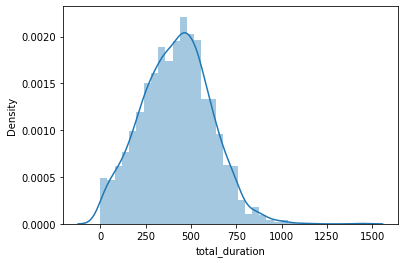

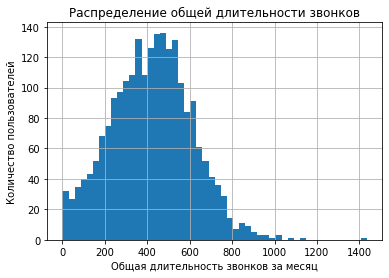

In [32]:
sns.distplot(data_smart['total_duration'])
plt.show()

ax = data_smart['total_duration'].hist(bins=50)
ax.set_xlabel("Общая длительность звонков за месяц")
ax.set_ylabel("Количество пользователей")
ax.set_title('Распределение общей длительности звонков')

plt.show()

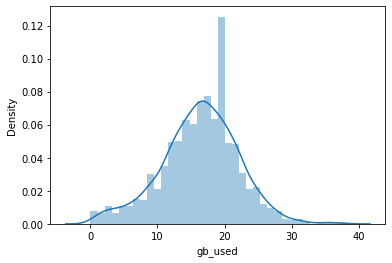

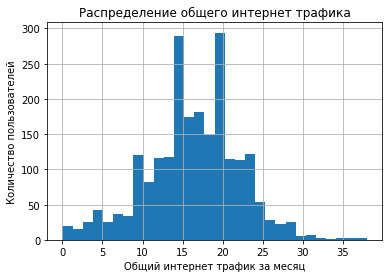

In [33]:
sns.distplot(data_smart['gb_used'])
plt.show()

ax = data_smart['gb_used'].hist(bins=30)
ax.set_xlabel("Общий интернет трафик за месяц")
ax.set_ylabel("Количество пользователей")
ax.set_title('Распределение общего интернет трафика')

plt.show()

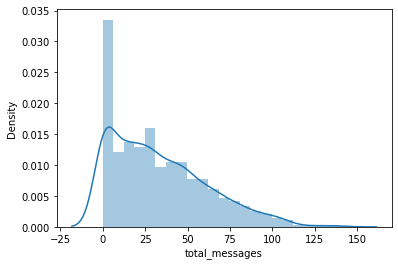

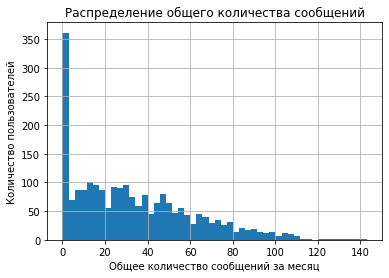

In [34]:
sns.distplot(data_smart['total_messages'])
plt.show()

ax = data_smart['total_messages'].hist(bins=50)
ax.set_xlabel("Общее количество сообщений за месяц")
ax.set_ylabel("Количество пользователей")
ax.set_title('Распределение общего количества сообщений')

plt.show()

### Вывод по тарифу smart

Все графики подтверждают наши значения среднего, также стандартного отклонения, можно заметить, что среднее +- (3 стандартных) охватит почти все значения. (про дисперсию я недопонял, даже не понимаю, что она показывает и что можно по её значению сказать)

Также можно заметить, что в данным тарифе ограничение по числу гигабайт - 15, поэтому есть некий выбрас перед значением 15. Также есть выброс на значение 20, он скорее всего связан, что у данного оператора есть опция докупки трафика +5 гб.

Выброс на значении ноль на распределении количества смс сообщений весьма естественен, так как мало кто ими сейчас пользуется. 

Также можно земетить, что больше половины пользователей превышают лимит интернет трафика. При этом видно, что хоть сообщениями пользуются мало, но всё же какая-то часть превышает допустимый лимит. А вот с общей длительностью звонков примерно такая ситуация: две трети укладываются в лимит, а остальные превосходят его. 

### Тариф ultra

In [35]:
print('Среднее значение длительности разговора для тарифа ультра:', data_ultra['total_duration'].mean())
print('Среднее значение используемого интернет трафика для тарифа ультра:', data_ultra['gb_used'].mean())
print('Среднее значение количества сообщений пользователя для тарифа ультра:', data_ultra['total_messages'].mean())

Среднее значение длительности разговора для тарифа ультра: 545.4511041009464
Среднее значение используемого интернет трафика для тарифа ультра: 19.487907465825447
Среднее значение количества сообщений пользователя для тарифа ультра: 49.03364879074658


In [36]:
print('Стандартное отклонение для длительности разговора тарифа ультра равно:', statistics.pstdev(data_ultra['total_duration']))
print('Стандартное отклонение для используемого трафика тарифа ультра равно:', statistics.pstdev(data_ultra['gb_used']))
print('Стандартное отклонение для количества сообщений пользователя тарифа ультра равно:', statistics.pstdev(data_ultra['total_messages']))

Стандартное отклонение для длительности разговора тарифа ультра равно: 306.76434143143143
Стандартное отклонение для используемого трафика тарифа ультра равно: 9.885230511573157
Стандартное отклонение для количества сообщений пользователя тарифа ультра равно: 46.865995995952495


In [37]:
print('Дисперсия для длительности разговора тарифа ультра равно:', statistics.pstdev(data_ultra['total_duration']) ** 2)
print('Дисперсия для используемого трафика тарифа ультра равно:', statistics.pstdev(data_ultra['gb_used']) ** 2)
print('Дисперсия для количества сообщений пользователя тарифа ультра равно:', statistics.pstdev(data_ultra['total_messages']) ** 2)

Дисперсия для длительности разговора тарифа ультра равно: 94104.36117385984
Дисперсия для используемого трафика тарифа ультра равно: 97.71778226693691
Дисперсия для количества сообщений пользователя тарифа ультра равно: 2196.4215806926354


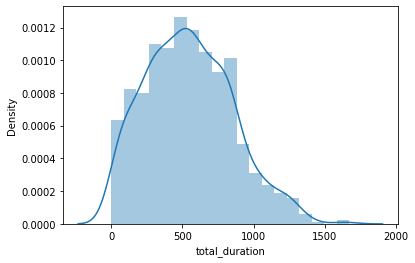

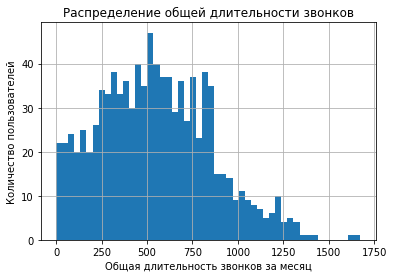

In [38]:
sns.distplot(data_ultra['total_duration'])
plt.show()

ax = data_ultra['total_duration'].hist(bins=50)
ax.set_xlabel("Общая длительность звонков за месяц")
ax.set_ylabel("Количество пользователей")
ax.set_title('Распределение общей длительности звонков')

plt.show()

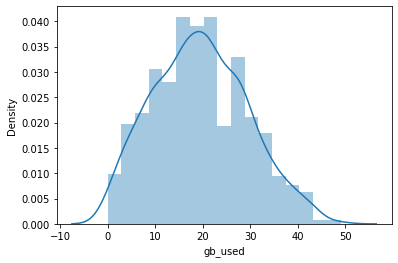

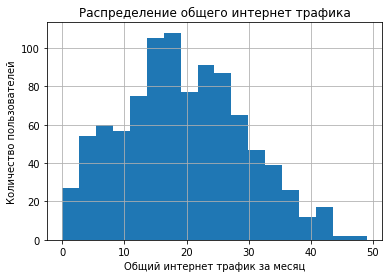

In [39]:
sns.distplot(data_ultra['gb_used'])
plt.show()

ax = data_ultra['gb_used'].hist(bins=18)
ax.set_xlabel("Общий интернет трафик за месяц")
ax.set_ylabel("Количество пользователей")
ax.set_title('Распределение общего интернет трафика')

plt.show()

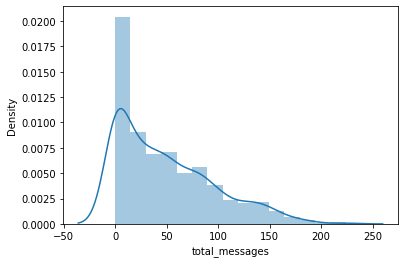

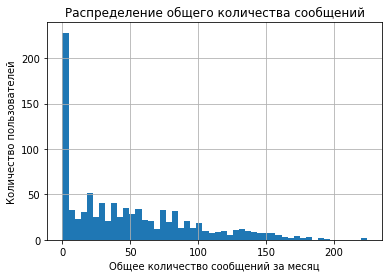

In [40]:
sns.distplot(data_ultra['total_messages'])
plt.show()

ax = data_ultra['total_messages'].hist(bins=50)
ax.set_xlabel("Общее количество сообщений за месяц")
ax.set_ylabel("Количество пользователей")
ax.set_title('Распределение общего количества сообщений')

plt.show()

### Вывод по тарифу ultra

По тарифу ultra можно сказать тоже самое, что и по тарифу smart.
Единственное, нет каких-то выделяющихся значений на фоне остальных на распределении используемого трафика.

### Общий вывод

Можно сказать, что те, кто берут тариф ultra в действительности в среднем больше испольщуют минут, трафика и сообщений. 

Но можно заметить, что в тарифе ultra допустимые значения минут в 6 раз больше, допустимого трафика в 2 раза больше, сообщений в 20 раз. А на самом деле мы видим, что средние значения совсем не увеличиваются в кратное количество раз.

Можно даже предложить гипотезу, что тариф ultra берут только ради большего количества трафика.

## Проверка Гипотез

**Проверим две гипотезы:** <br>
1) средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются;<br>
2) средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов

### Первая гипотеза

Средняя выручка пользователей тарифов «Ультра» и «Смарт» различаются.

Возьмем за нулевую гипотезу: средняя выручка пользователей тарифов «Ультра» и «Смарт» равны.<br>
Выборки независимы.

In [41]:
from scipy import stats as st
import numpy as np

results = st.ttest_ind(
    data_smart['revenue'],
    data_ultra['revenue'],
    equal_var = False
) 

alpha = 0.01

if  results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Отвергаем нулевую гипотезу


In [42]:
print(data_smart['revenue'].mean())
print(data_ultra['revenue'].mean())
print()
print(data_smart['revenue'].count())
print(data_ultra['revenue'].count())
print()
print(results.pvalue)

1290.8911381016644
2070.9779179810726

2223
951

3.155173205867294e-245


### Вторая гипотеза

Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.

Возьмем за нулевую гипотезу: средняя выручка пользоавтелей из Москвы равна средней выручке пользователей из других регионов.<br>
Выборки также будут независымими.

In [43]:
data_Moscow = data[data['city'] == 'Москва']
data_region = data[data['city'] != 'Москва']

In [44]:
results = st.ttest_ind(
    data_Moscow['revenue'],
    data_region['revenue'],
    equal_var = False
) 

alpha = 0.01

if  results.pvalue < alpha:
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

Не получилось отвергнуть нулевую гипотезу


### Вывод

Получилось, что гипотеза о различии средней выручки от тарифов ultra и smart верна и может быть дальше исследована.

А вот гипотеза о различии средней выручки пользователей из Москвы и других регионов не верна и далее её не стоит рассмтривать.

Также мы посмотрели на средние выручки тарифа smart и тарифа ultra, выручка второго оказалась боольше. Но количество пользователей тарифа smart больше, чем пользователей тарифа ultra.

## Общий вывод

В данном проекте мы работали с компанией "Мегалайн" - оператором сотовой связи. Оператор предлагает польщователям два тарифных плана "Смарт" и "Ультра". Нам предоставили небольшую выборку клиентов - 500 пользователей, дали нам о них всю необходимю информацию.

Был проведен анализ тарифов по данной выборке клиентов. А также проверны некоторые гипотезы. Которые нам дали основания полагать, что средняя выручка пользователей из Москвы и других регионов возможно отличается. А также мы узнали, что средняя выручка пользователей тарифа smart и ultra отличаюся, при этом средняя выручка тарифа ultra выше, поэтому Мегалайну стоит обратить на этот тариф больше внимания. 

Но также можно добавить, что из данной выборки следует, что пользователей тарифа smart болльше, чем в два раза, а средняя выручке меньше меннее, чем в два раза. Поэтому можно выдвинуть гипотезу о том, что в данный момент компании больший доход приносит именно тариф smart. И это также не нужно упускать из виду.